In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tfs = pd.read_excel("/cellar/users/aklie/data/beta_cell_networks/auxiliary/SC-beta_TFs.xlsx", sheet_name=0)

In [3]:
in_vitro_tfs = tfs["in vitro SC-beta specific"].dropna()
sc_beta_specific = tfs["SC-beta specific compared to primary beta"].dropna()
sc_beta_shared = tfs["SC-β & primary-β shared TFs"].dropna()

In [7]:
H5AD_FILE = "/cellar/users/aklie/data/beta_cell_networks/multiome_stimulated_sc/14sep22_DM023_palmitate_endocrine.h5ad"

In [5]:
import scanpy as sc

In [8]:
adata = sc.read_h5ad(H5AD_FILE)

In [9]:
in_vitro_tfs = in_vitro_tfs[in_vitro_tfs.isin(adata.var.index)]
sc_beta_specific = sc_beta_specific[sc_beta_specific.isin(adata.var.index)]
sc_beta_shared = sc_beta_shared[sc_beta_shared.isin(adata.var.index)]

In [71]:
tf_dict = {
    "in vitro SC-beta specific": in_vitro_tfs,
    "SC-beta specific compared to primary beta": sc_beta_specific,
    "SC-β & primary-β shared TFs": sc_beta_shared
}
tfs = []
[tfs.append(list(keys)) for keys in tf_dict.values()]
tfs = np.array([item for sublist in tfs for item in sublist])

In [76]:
all_tfs = set(pd.read_csv("/cellar/users/aklie/opt/shared/SCENIC/tf_lists/allTFs_hg38.txt", header=None)[0].values)
tfs = all_tfs

In [77]:
exp_mat = adata.layers["logcounts"].todense()

In [78]:
tf_ind = np.where(adata.var.index.isin(tfs))[0]

In [79]:
tf_exp_df = pd.DataFrame(data=exp_mat[:, tf_ind].T, columns=adata.obs.index, index=adata.var.index[tf_ind])

In [80]:
from scipy.stats import zscore

In [82]:
zscore(tf_exp_df.mean(axis=1)).sort_values(ascending=False).iloc[:50]

RORA       8.777851
GLIS3      6.665174
DACH1      6.661679
TCF12      5.325114
SOX5       5.324885
NF1        5.068931
SETBP1     5.049473
JAZF1      4.932031
RFX3       4.895288
ZBTB20     4.864704
FOXP1      4.828694
MSI2       4.702012
FOXN3      4.525389
RBFOX2     4.503356
LRRFIP1    4.471028
RUFY3      4.454758
NR3C1      4.443811
GTF2I      4.421451
LCORL      4.370068
CUX1       4.321535
BPTF       4.289810
HIVEP3     4.236432
NCOA1      4.154702
CHD2       4.075753
PBX3       4.014565
PBX1       4.011745
A1CF       3.989383
CERS6      3.885487
NCOA2      3.792032
SND1       3.787822
ZEB1       3.758593
MLLT10     3.748982
PHF21A     3.694971
FOXO1      3.539558
LCOR       3.532310
CELF4      3.513058
ZNF516     3.488408
FOXP2      3.441172
TEAD1      3.373136
SSBP3      3.348825
SIM1       3.305642
NFAT5      3.279130
RFX6       3.275663
NCOR1      3.258236
ZNF518A    3.185902
ZNF407     3.152773
STAU2      3.108612
CBFA2T2    3.079661
TBL1XR1    3.049615
FOXJ3      3.018841


In [44]:
len(np.where(adata.var.index.isin(tfs))[0])

133

In [43]:
len(tfs)

162

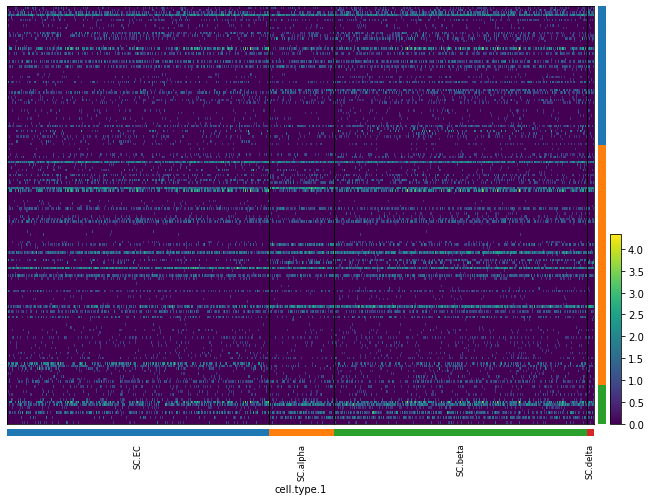

In [33]:
ax = sc.pl.heatmap(adata, tf_dict, groupby='cell.type.1', layer='logcounts', cmap='viridis', swap_axes=True, show_gene_labels=False, figsize=(11,8))a

In [38]:
beta_adata = adata[adata.obs["cell.type.1"] == "SC.beta"]
ctrl_adata = adata[adata.obs["condition"] == "ctrl"]
ctrl_beta_adata = beta_adata[beta_adata.obs["condition"] == "ctrl"]

In [44]:
adata

AnnData object with n_obs × n_vars = 16342 × 28796
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'ATAC.weight', 'wsnn_res.0.2', 'seurat_clusters', 'log_nCount_ATAC', 'log_nCount_SCT', 'log_nFeature_ATAC', 'log_nFeature_SCT', 'nCount_mpeak', 'nFeature_mpeak', 'batch', 'condition', 'time_point', 'sample', 'atac_raw_reads', 'atac_mitochondrial_reads', 'atac_fragments', 'atac_pct.mt', 'TSS.enrichment', 'TSS.percentile', 'mpeak.weight', 'wsnn_res.0.3', 'nCount_peaks', 'nFeature_peaks', 'peaks.weight', 'wsnn_res.0.5', 'nCount_peak', 'nFeature_peak', 'cell.type.1', 'cell.type.2', 'ident'
    uns: 'cell.type.1_colors', 'dendrogram_cell.type.1'
    obsm: 'HARMONY.SCT', 'UMAP.SCT', 'X_pca'
    layers: 'logcounts'

/cellar/users/aklie/opt/miniconda3/envs/scverse-py38/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


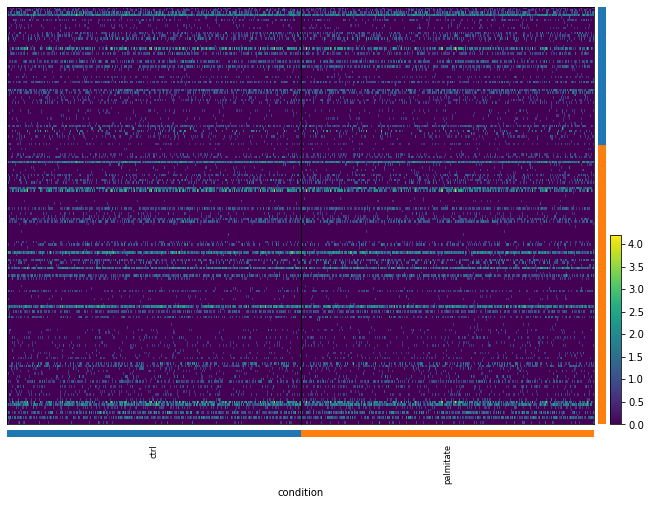

In [42]:
ax = sc.pl.heatmap(beta_adata, tf_dict, groupby='condition', layer='logcounts', cmap='viridis', swap_axes=True, show_gene_labels=False, figsize=(11,8))

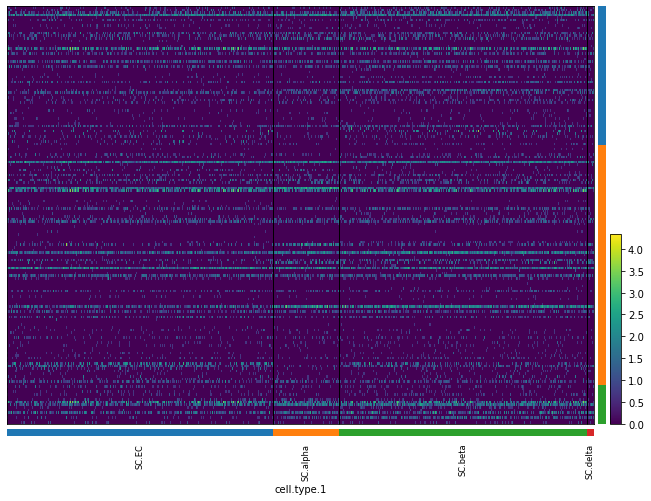

In [43]:
ax = sc.pl.heatmap(ctrl_adata, tf_dict, groupby='cell.type.1', layer='logcounts', cmap='viridis', swap_axes=True, show_gene_labels=False, figsize=(11,8))

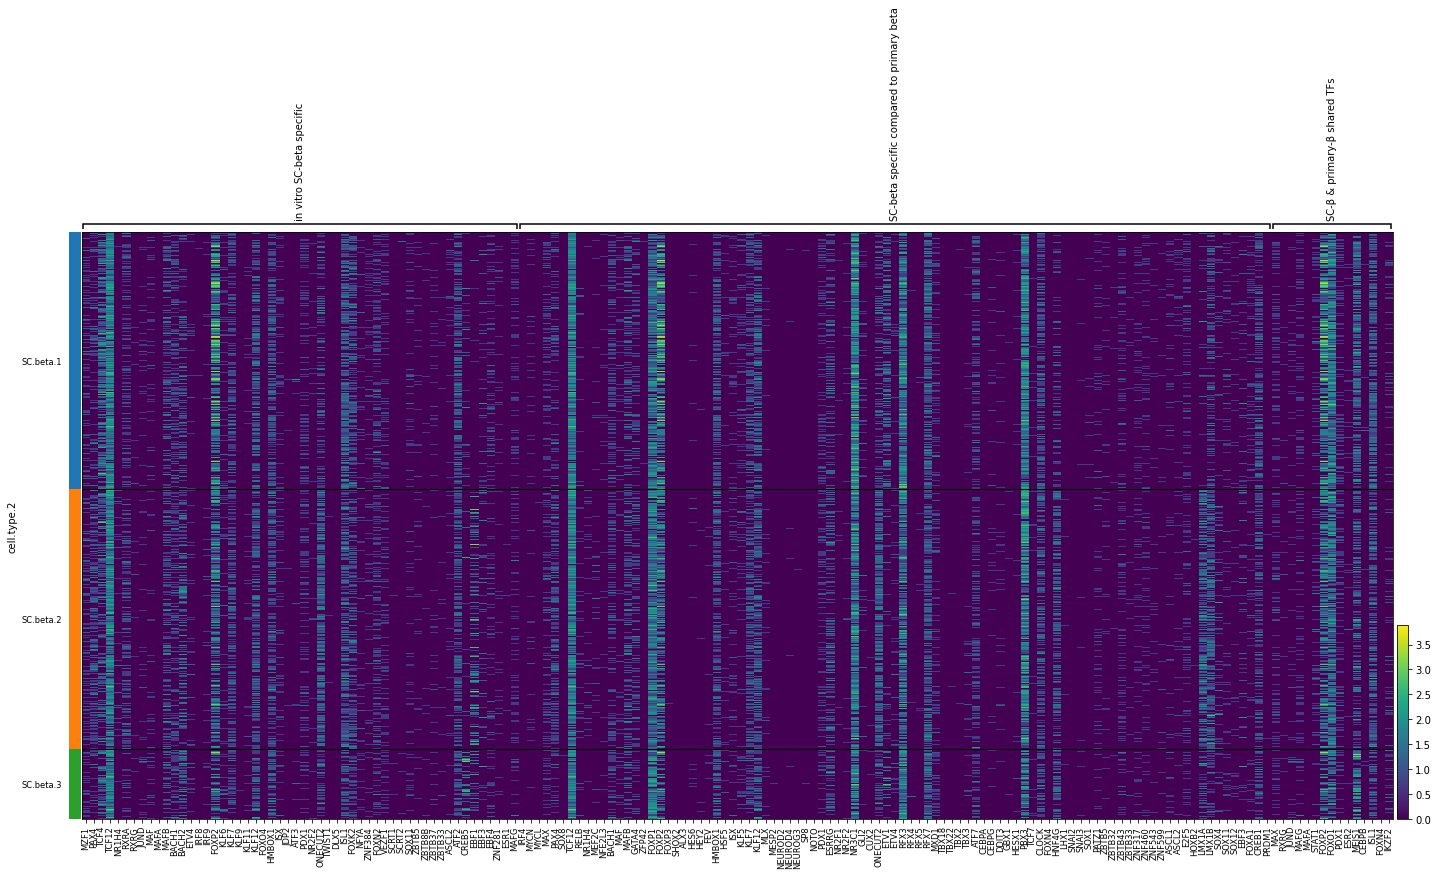

In [119]:
ax = sc.pl.heatmap(ctrl_beta_adata, tf_dict, groupby='cell.type.2', layer='logcounts', cmap='viridis', show_gene_labels=True, figsize=(24,11))

In [46]:
tfs = pd.Index(list(in_vitro_tfs) + list(sc_beta_specific) + list(sc_beta_shared))

In [52]:
ctrl_beta_adata_tfs_only = ctrl_beta_adata[:, ctrl_beta_adata.var.index.isin(tfs)]

In [90]:
tf_means = np.array(ctrl_beta_adata_tfs_only.layers["logcounts"].mean(axis=0)).squeeze(axis=0)

In [91]:
tf_means

array([2.09444804e-02, 3.92384478e-04, 1.17715343e-03, 1.14939150e-02,
       4.74485484e-01, 1.59101581e-02, 7.13735570e-02, 4.48504312e-02,
       1.41777659e-02, 4.56715829e-01, 8.70734105e-02, 2.33321252e-02,
       4.13856468e-02, 2.96171362e-01, 7.58315744e-01, 1.79837354e-01,
       3.92384478e-04, 6.02570375e-02, 6.18180567e-01, 1.46362302e-01,
       5.13946358e-01, 4.79850385e-01, 1.13893701e-01, 1.06610568e-02,
       2.68969235e-02, 2.10925835e-02, 1.31942680e+00, 3.92384478e-04,
       5.84681331e-01, 3.33526806e-03, 7.68405001e-01, 4.88881813e-02,
       9.71343361e-03, 2.70931158e-02, 1.51960738e+00, 3.06760141e-01,
       0.00000000e+00, 1.26897601e-01, 8.75991468e-02, 0.00000000e+00,
       4.89433207e-01, 3.95718275e-03, 4.51242150e-03, 6.68560675e-03,
       3.12899591e-01, 2.66526421e-03, 9.80961195e-04, 3.50074812e-02,
       1.33015980e-01, 7.84768956e-04, 1.14431228e+00, 3.55128758e-01,
       2.94288359e-03, 2.70611432e-01, 6.00697131e-01, 7.84768956e-04,
      

In [109]:
tmp = ctrl_beta_adata_tfs_only.var.index[tf_means.argsort()[::-1]]

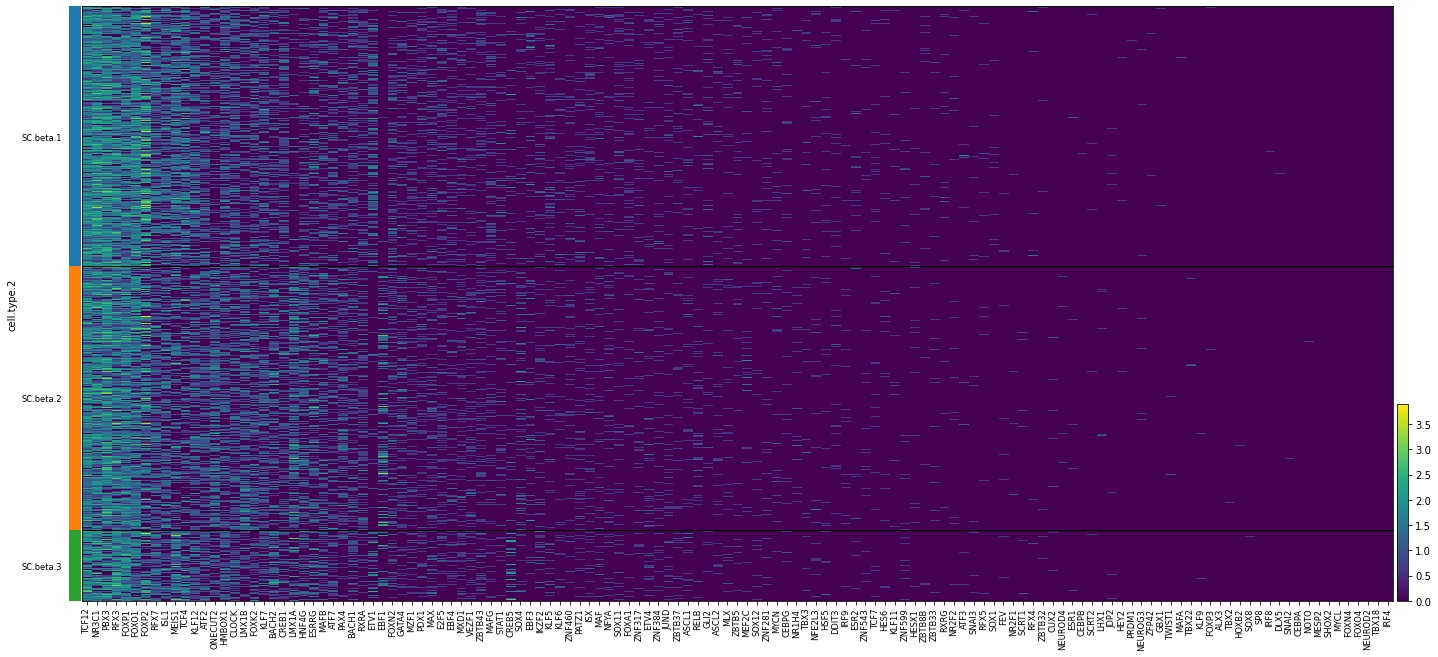

In [117]:
ax = sc.pl.heatmap(ctrl_beta_adata_tfs_only, var_names=tmp, groupby='cell.type.2', layer='logcounts', cmap='viridis', swap_axes=False, show_gene_labels=True, figsize=(24,11))